Disini kita akan menggunakan data iris.cv yang dikirim oleh ibu, dengan data ini kita akan mencari apakah sebuah species setosa atau bukan.

In [1]:
# Modul yang akan digunakan

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import numpy as np

# Library yang dibutuhkan
- maplotlib
- pandas
- numpy
- ipympl

# Persiapan data

## Lihat datanya

In [2]:
# Kita ambil dulu datanya
data=pd.read_csv(r"iris.csv")

data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data[data['species'] == 'versicolor'].head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [4]:
data[data['species'] == 'virginica'].head()

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica


In [5]:
# Kolumnya dan koefisien yang akan digunakan
print(data.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [6]:
# Semua spesies yang ada di data
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## Filter datanya agar mudah digunakan

In [7]:
# Disini kita akan memfilter jadi akan dibagi menjadi species masing masing
data_setosa = data[data['species'] == 'setosa']
data_versicolor = data[data['species'] == 'versicolor']
data_virginica = data[data['species'] == 'virginica']

## Plot semua data

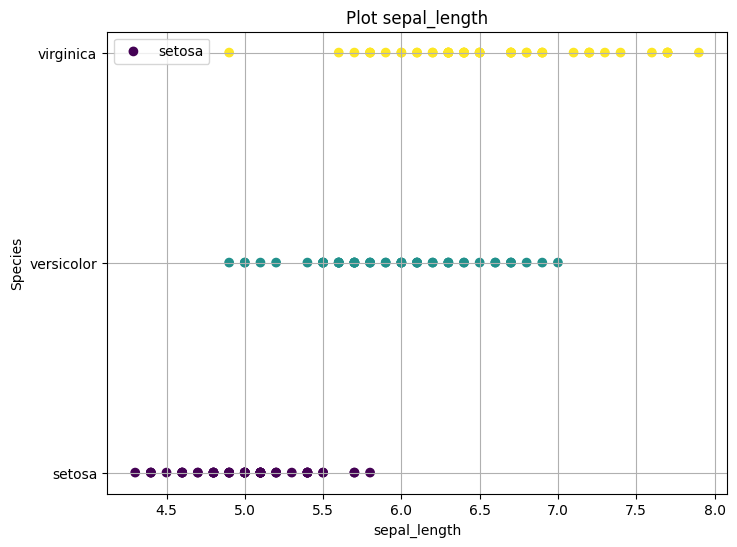

In [8]:
%matplotlib inline

# Plot berdasarkan sepal_width
plt.figure(figsize=(8, 6))  # Adjust figure size as desired
plt.scatter(data['sepal_length'], data['species'], c=data['species'].astype('category').cat.codes)  # Color based on category codes
plt.xlabel('sepal_length')
plt.ylabel('Species')
plt.title('Plot sepal_length')

# Add legend
plt.legend(data['species'].unique())  # Get unique species for legend

plt.grid(True)
plt.show()

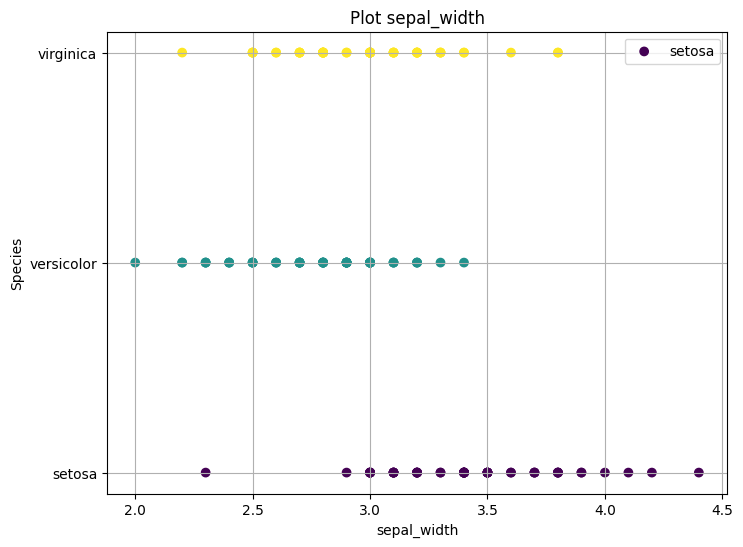

In [9]:
%matplotlib inline

# Plot berdasarkan as
plt.figure(figsize=(8, 6))  # Adjust figure size as desired
plt.scatter(data['sepal_width'], data['species'], c=data['species'].astype('category').cat.codes)  # Color based on category codes
plt.xlabel('sepal_width')
plt.ylabel('Species')
plt.title('Plot sepal_width')

# Add legend
plt.legend(data['species'].unique())  # Get unique species for legend

plt.grid(True)
plt.show()

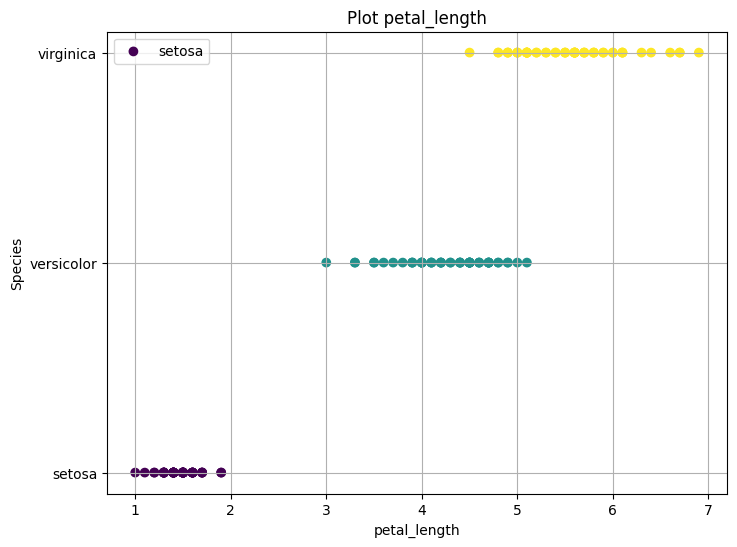

In [10]:
%matplotlib inline

# Plot berdasarkan petal_length
plt.figure(figsize=(8, 6))  # Adjust figure size as desired
plt.scatter(data['petal_length'], data['species'], c=data['species'].astype('category').cat.codes)  # Color based on category codes
plt.xlabel('petal_length')
plt.ylabel('Species')
plt.title('Plot petal_length')

# Add legend
plt.legend(data['species'].unique())  # Get unique species for legend

plt.grid(True)
plt.show()

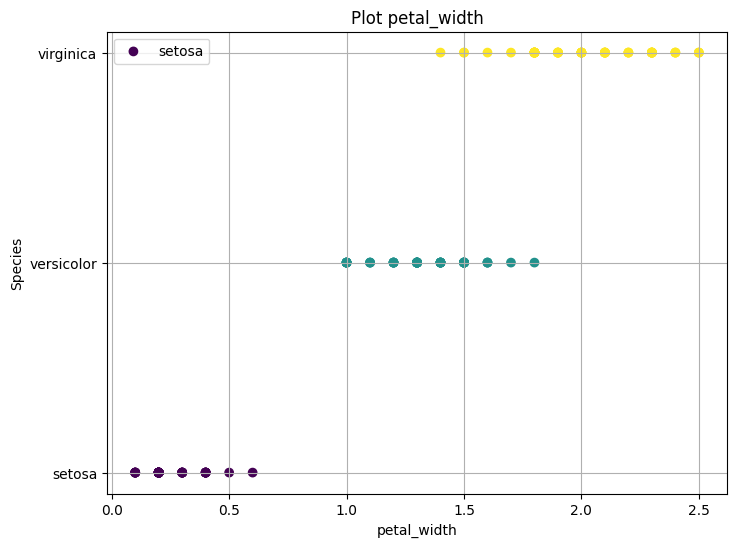

In [11]:
%matplotlib inline

# Plot berdasarkan petal_width
plt.figure(figsize=(8, 6))  # Adjust figure size as desired
plt.scatter(data['petal_width'], data['species'], c=data['species'].astype('category').cat.codes)  # Color based on category codes
plt.xlabel('petal_width')
plt.ylabel('Species')
plt.title('Plot petal_width')

# Add legend
plt.legend(data['species'].unique())  # Get unique species for legend

plt.grid(True)
plt.show()

Disini kita bisa melihat bahwa ada 2 data yang paling bisa membedakan/mengklasifikasi apakah bunga spesies setosa atau bukan. Data tersebut yaitu data petal_length, dan petal_width.

Disini kita akan menggunakan data **petal_width** dikarenakan data tersebut yang akan paling simpel untuk di latih nanti.

Pertama kita akan menggabungkan data terlebih dahulu ke kategorinya masing-masing.

Disini data spesies setosa akan menjadi 0 dan spesies lainnya akan menjadi 1

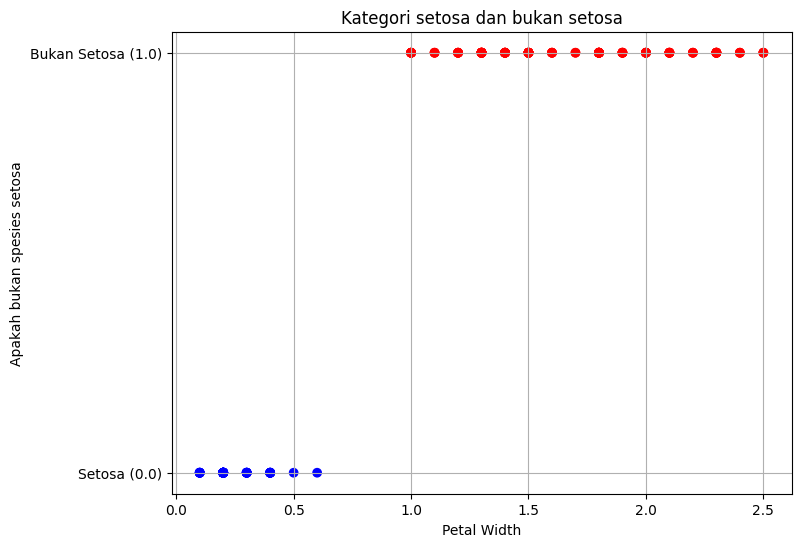

In [12]:
%matplotlib inline

# Fungsi yang akan membuat y menjadi 0/1 tergantung spesies
def get_y_value_species(species):
    if species == 'setosa':
        return 0
    else:
        return 1

# Create lists for x and y values
petal_widths = data['petal_width'].tolist()
plot_y_setosa_dan_spesies_lain = [get_y_value_species(species) for species in data['species']]

# Jika setosa maka warnanya biru, jika lain merah
colors = ['blue' if spesies == 0 else 'red' for spesies in plot_y_setosa_dan_spesies_lain]

# Buat plotnya
plt.figure(figsize=(8, 6))
plt.scatter(petal_widths, plot_y_setosa_dan_spesies_lain, c=colors)  # Set color for all points

# Label
plt.xlabel('Petal Width')

plt.ylabel('Apakah bukan spesies setosa')
plt.yticks([0, 1], ['Setosa (0.0)', 'Bukan Setosa (1.0)'])

# Title
plt.title('Kategori setosa dan bukan setosa')

# Grid
plt.grid(True)

# Show the plot
plt.show()


Ok sekarang adalah bagian pentingnya, logistic regregression itu anggapannya seperti sebuah fungsi yang jika kita masukkan input maka outputnya akan menjadi kemungkinan sesuatu terjadi.

Contohnya jika kita masukkan berapa cm tinggi air kita bisa mengetahui berapa kemungkinan akan banjir.

Dan jika kita ingin menjadikan jawabannya binary (Hanya menjadi iya atau tidak) maka kita bisa menggunakan nilai *threshold* untuk mengekang nilainya. Contohnya jika kemungkinan banjir >= 0.5 maka artinya akan banjir.

Fungsi atau model utama yang akan kita gunakan disini adalah sebuah fungsi yang bernama [Fungsi Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function).

Rumusnya adalah sebagai berikut: $\sigma(x) = \frac{1}{1+e^{-x}}$

Jika kita grafikkan akan menjadi seperti ini:

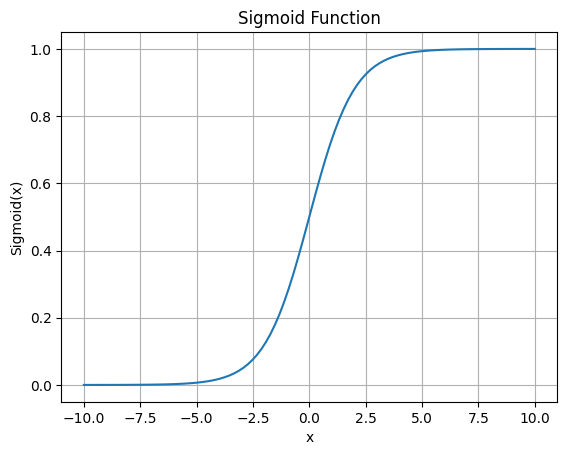

In [13]:
%matplotlib inline

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate x values
x_values = np.linspace(-10, 10, 100)  # Generate 100 values from -10 to 10

# Calculate y values using the sigmoid function
y_values = sigmoid(x_values)

# Plot the sigmoid function
plt.plot(x_values, y_values)
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('Sigmoid(x)')
plt.grid(True)
plt.show()


Seperti yang bisa dilihat fungsi sigmoid memberikan keluaran diantara 1 dan 0.

Dikarenakan hal tersebut fungsi ini bagus dijadikan fungsi untuk melihat berepa persen kemungkinan sesuatu terjadi, atau dijadikan model pengklasifikasi dengan menggunakan *threshold*.

Fungsi ini juga memberikan sebuah keluaran yang *smooth* dan karena hal itu juga fungsi ini bisa digunakan untuk melihat berapa persen kemungkinan sesuatu terjadi.

Fungsi sigmoid ini akan kita gunakan untuk menjadi fungsi model pengklasifikasian data ini.

Keluarannya adalah jika ≈ 0 maka spesies setosa, jika ≈ 1 maka bukan spesies setosa.

Dalam penggunaan fungsi sigmoid untuk klasifikasi regrisi logistik ini, fungsinya dimodifikasi menjadi ini:
$$
sigma(b+wx) = \frac{1}{1+e^{-(b+wx)}}
$$
Dimana 'b' adalah batas y nya, dan 'w' menunjukan 'semiring' apa fungsinya

**Dalam training ini nilai *b* dan *w* ini yang akan kita cari nanti**

Kita bisa mencoba untuk mencari nilai *b* dan *w* secara manual dengan grafik interaktif berikut, cobalah untuk membuat fungsinya agar semua data yang 0 ada di dekat garis 0 dan 1 ada di dekat 1:

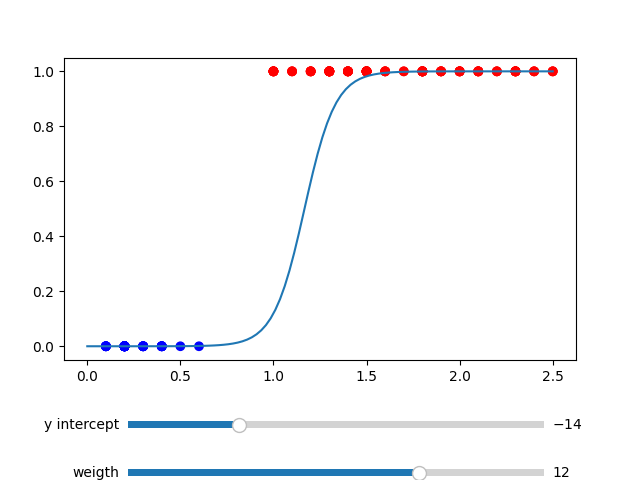

No such comm: 5a89c967077d492dbdfd9b9ceb9732ea


In [14]:
%matplotlib widget

##
## SCATTER DATANYA
##


petal_widths = data['petal_width'].tolist()
plot_y_setosa_dan_spesies_lain = [get_y_value_species(species) for species in data['species']]

# Jika setosa maka warnanya biru, jika lain merah
colors = ['blue' if spesies == 0 else 'red' for spesies in plot_y_setosa_dan_spesies_lain]


##
## FUNGSI SIGMA
##

def log_reg(x, b, w):
    return 1 / (1 + np.exp(-(b+w*x)))

boundary = -14.0
weigth = 12.0

# Generate some data
x = np.linspace(0, 2.5, 100)
y = log_reg(x, boundary, weigth)

# Create the plot
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.1, bottom=0.25)  # Adjust the position of the slider

# Plot the initial data
line, = ax.plot(x, y)
plt.scatter(petal_widths, plot_y_setosa_dan_spesies_lain, c=colors)  # Scatter datanya

# Add a slider for adjusting frequency
ax_b = plt.axes([0.2, 0.1, 0.65, 0.03])  # Define the position and size of the slider
ax_w = plt.axes([0.2, 0, 0.65, 0.03])  # Define the position and size of the slider
b_slider = Slider(ax_b, 'y intercept', -30.0, 30.0, valinit=-14.0)
w_slider = Slider(ax_w, 'weigth', -30.0, 30.0, valinit=12.0)

# Update function for the slider
def update(val):
    boundary = b_slider.val
    weigth = w_slider.val
    line.set_ydata(log_reg(x, boundary, weigth))
    fig.canvas.draw_idle()

b_slider.on_changed(update)
w_slider.on_changed(update)


plt.grid(True)

plt.show()


Selanjutnya yang akan kita coba adalah membuat nya mempelajari sendiri apa koefisien yang dibutuhkan untuk mendapatkan fungsi tersebut.

Koefisien yang dimaksud disini adalah $b$ dan $w$

**Jadi disini maksud dari training adalah mencari jumlah $b$ dan $w$ yang paling mendekati datanya**.

Disini cara kita mentraining nya adalah dengan menggunakan apa yang disebut dengan [**Gradient Descent**](https://en.wikipedia.org/wiki/Gradient_descent).

Rumus yang akan kita gunakan adalah something something yes.

In [75]:
set_fitur = petal_widths
set_label = plot_y_setosa_dan_spesies_lain
panjang_data = len(set_fitur)


optimal_b = 1
optimal_w = 1


iterasi = 100
learning_rate = 0.01

optimal_w_b_val = np.zeros((iterasi, 2))

for n in range(iterasi):
    sum_b = 0
    sum_w = 0
    for i in range(panjang_data):
        sum_b += (set_label[i] - sigmoid(set_fitur[i])) 
        sum_w += (set_label[i] - sigmoid(set_fitur[i])) * set_fitur[i]
    
    optimal_b += learning_rate * sum_b
    optimal_w += learning_rate * sum_w
    optimal_w_b_val[n, 0] = optimal_b
    optimal_w_b_val[n, 1] = optimal_w
    
print(f'b optimal = {optimal_b}; w optimal = {optimal_w}')


b optimal = -10.471549427973578; w optimal = 19.446963714812952


In [85]:
# Animasinya
def plot_log_reg(b, w):
    plot_x = np.linspace(-10, 10, 400)
    plot_y = sigmoid(b + w * plot_x)

    return (plot_x, plot_y)

In [86]:
%matplotlib inline


fig, ax = plt.subplots()
ax.axis([0, 4, 0,2])
l, = ax.plot([],[])

def animate(i):
    log_reg_plotnya = plot_log_reg(optimal_w_b_val[i][0], optimal_w_b_val[i][1])
    l.set_data(log_reg_plotnya[0], log_reg_plotnya[1])

plt.close()
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=100, interval=20)

from IPython.display import HTML
HTML(ani.to_jshtml())